## <h1><center> Lecture 4 - Examples </center></h1>

In this notebook you will see implementations with examples of Lecture 4. The main purpose of using this notebook is simply to confirm that you can run it and understand what it is doing without difficulty. 

Examples are the ones propose in the Book: Hyndman, R.J., & Athanasopoulos, G. (2018) Forecasting: principles and practice, 2nd edition, OTexts: Melbourne, Australia.
Online version: https://otexts.com/fpp2/

**Examples and Homework proposed in the slides** are in bold. These are not mandatory or graded, they are simply to encourage you to think how you could answer them.

Contacts are in the first point the Senior TAs:

Olivier Sprangers: o.r.sprangers@uva.nl

Sara Mahdavi Hezavehi: s.mahdavihezavehi@uva.nl 

Reshmi Gopalakrishna Pillai: r.gopalakrishnapillai@uva.nl 

or in the second point, the course coordinator

Cristian Rodriguez Rivero: c.m.rodriguezrivero@uva.nl

In [1]:
library(fpp2)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

-- Attaching packages ---------------------------------------------- fpp2 2.4 --

v ggplot2   3.3.2     v fma       2.4  
v forecast  8.13      v expsmooth 2.3  

Warning message:
"package 'forecast' was built under R version 4.0.3"




## Beer production

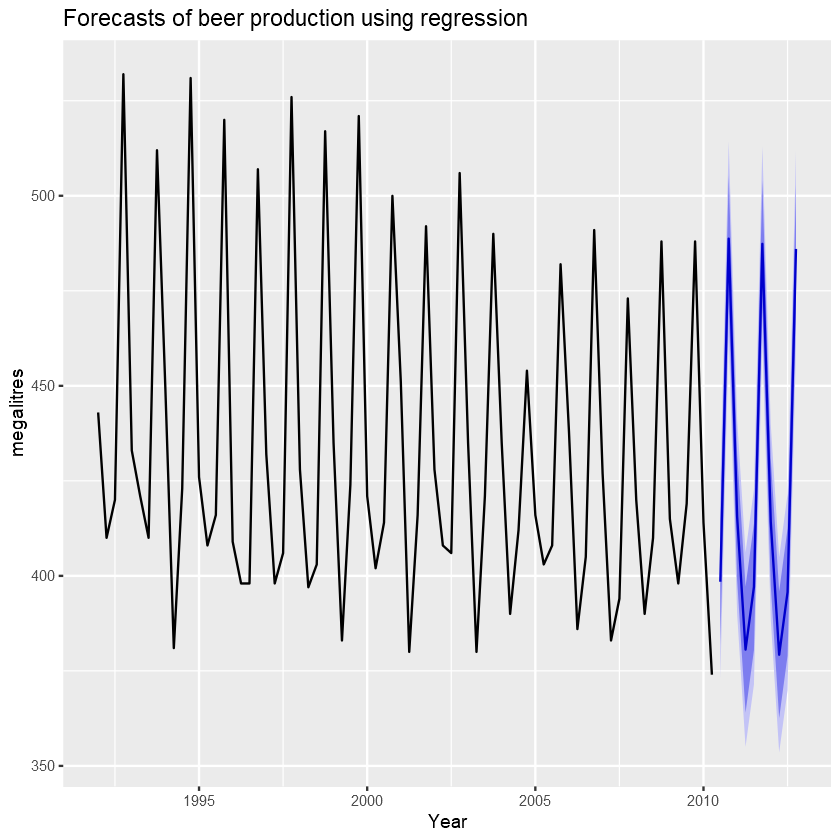

In [37]:
beer2 <- window(ausbeer, start=1992)
fit.beer <- tslm(beer2 ~ trend + season)
fcast <- forecast(fit.beer)
autoplot(fcast) +
ggtitle("Forecasts of beer production using regression") +
xlab("Year") + ylab("megalitres")

## US Consumption

In [38]:
fit.consBest <- tslm(
Consumption ~ Income + Savings + Unemployment,
data = uschange)
h <- 4
newdata <- data.frame(
Income = c(1, 1, 1, 1),
Savings = c(0.5, 0.5, 0.5, 0.5),
Unemployment = c(0, 0, 0, 0))
fcast.up <- forecast(fit.consBest, newdata = newdata)
newdata <- data.frame(
Income = rep(-1, h),
Savings = rep(-0.5, h),
Unemployment = rep(0, h))
fcast.down <- forecast(fit.consBest, newdata = newdata)

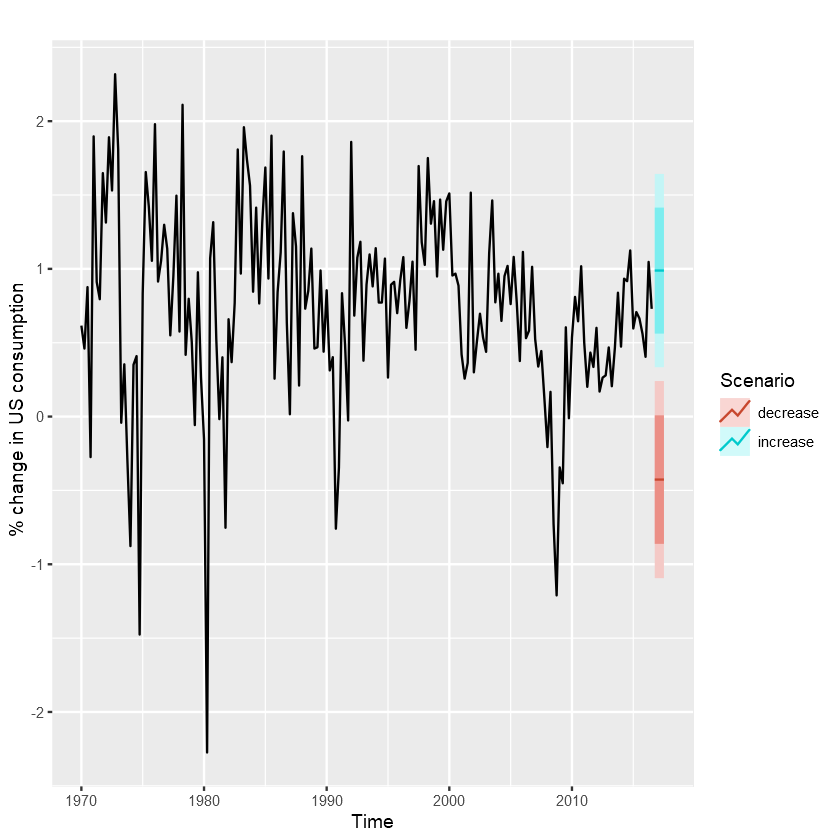

In [39]:
autoplot(uschange[, 1]) +
ylab("% change in US consumption") +
autolayer(fcast.up, PI = TRUE, series = "increase") +
autolayer(fcast.down, PI = TRUE, series = "decrease") +
guides(colour = guide_legend(title = "Scenario"))

# Time series components

## Time series patterns

## Euro electrical equipment

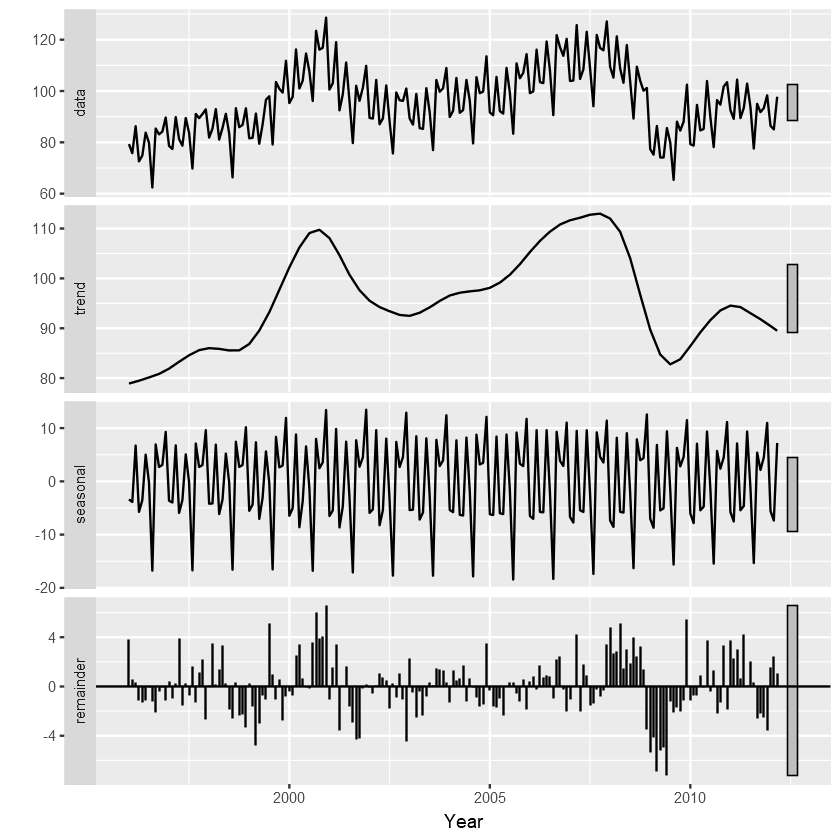

In [13]:
fit <- stl(elecequip, s.window=7)
autoplot(fit) + xlab("Year")

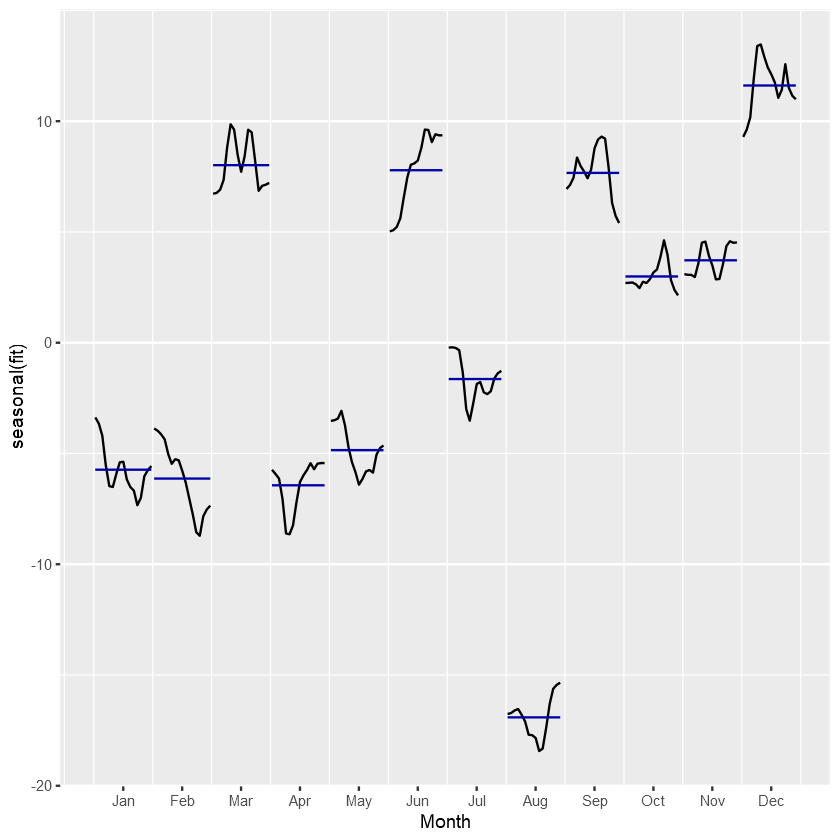

In [14]:
ggsubseriesplot(seasonal(fit))

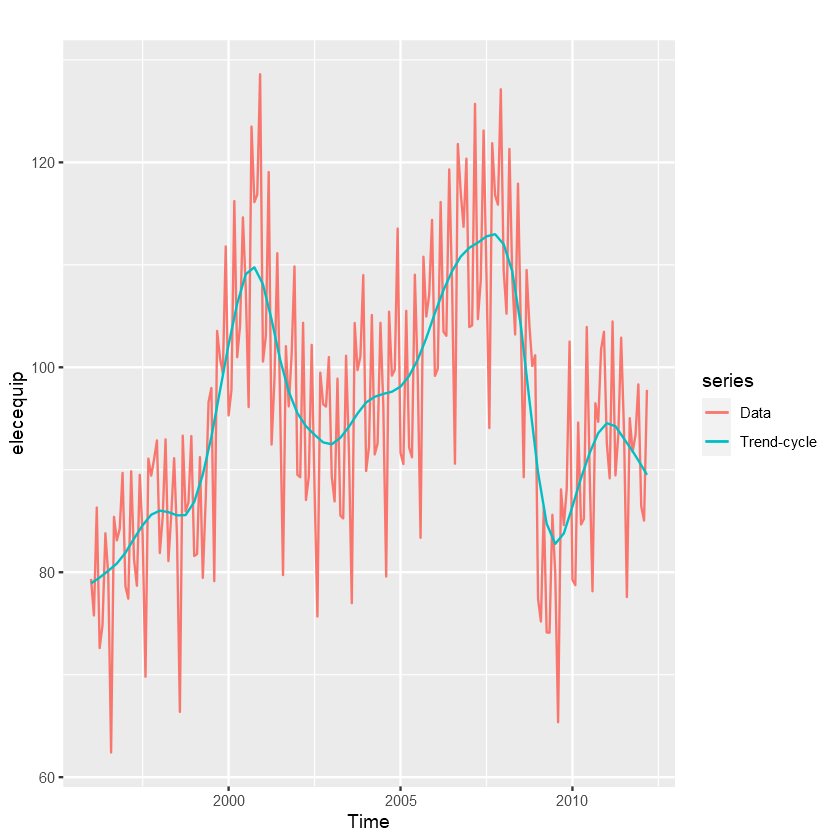

In [15]:
autoplot(elecequip, series="Data") +
  autolayer(trendcycle(fit), series="Trend-cycle")

# Seasonal adjustment

## Seasonal adjustment

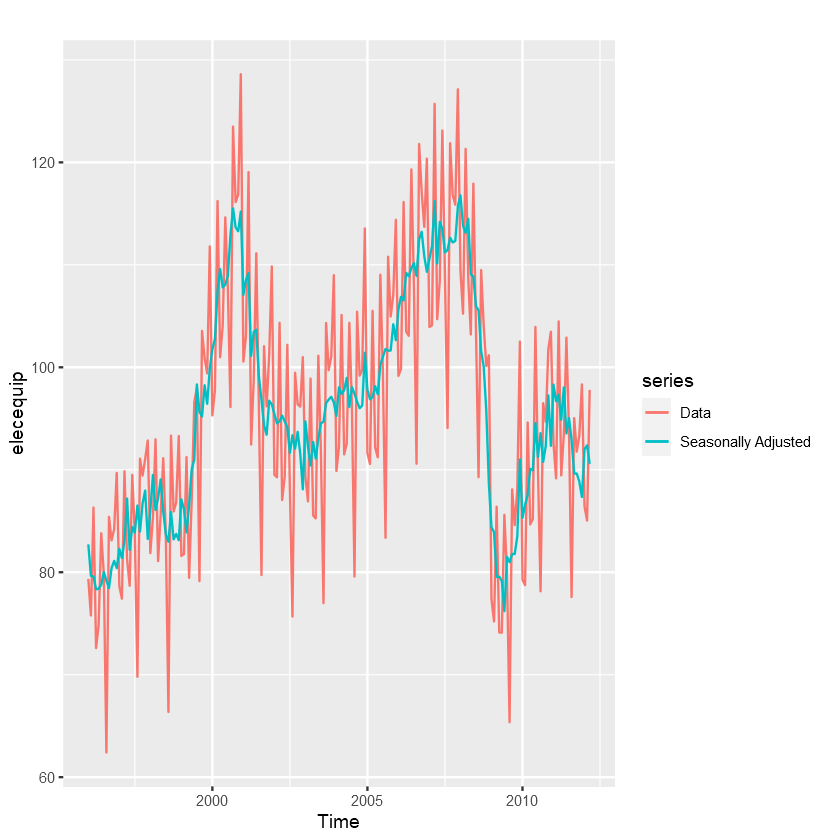

In [16]:
fit <- stl(elecequip, s.window=7)
autoplot(elecequip, series="Data") +
  autolayer(seasadj(fit), series="Seasonally Adjusted")

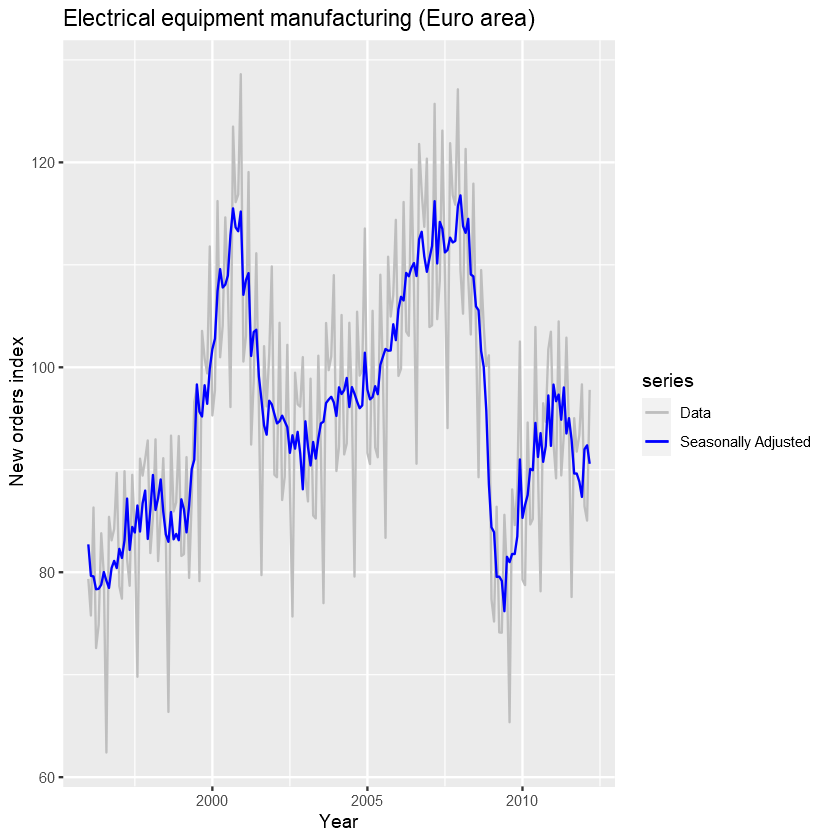

In [17]:
autoplot(elecequip, series="Data") +
  autolayer(seasadj(fit), series="Seasonally Adjusted") +
  xlab("Year") + ylab("New orders index") +
  ggtitle("Electrical equipment manufacturing (Euro area)") +
  scale_colour_manual(values=c("gray","blue"),
                     breaks=c("Data","Seasonally Adjusted"))

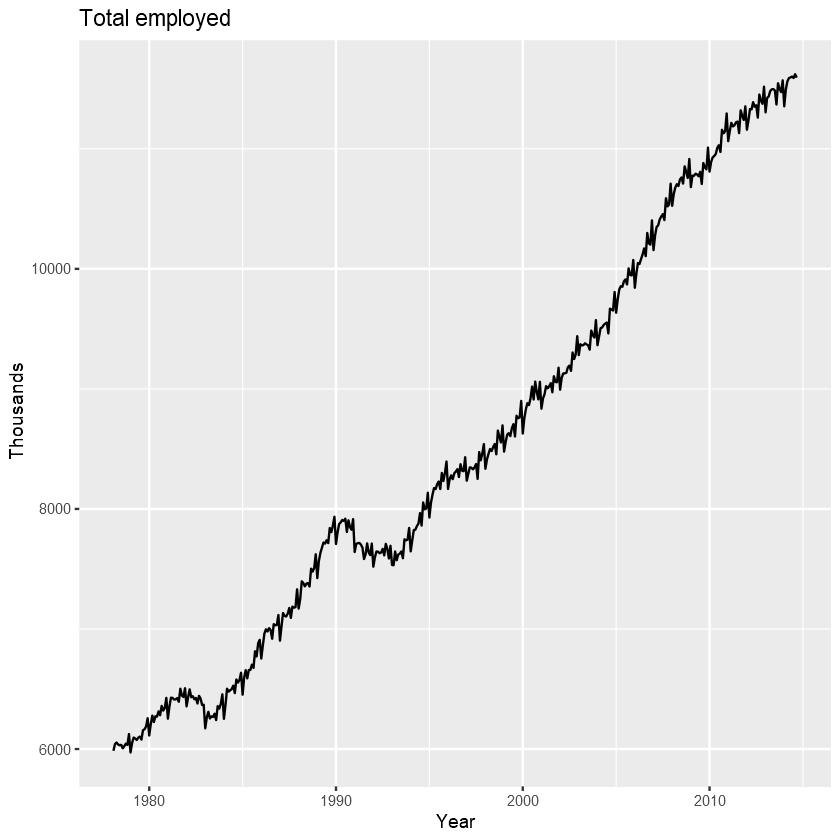

In [18]:
x <- ts(c(5985.7,6040.6,6054.2,6038.3,6031.3,6036.1,6005.4,6024.3,6045.9,6033.8,6125.4,5971.3,
  6050.7,6096.2,6087.7,6075.6,6095.7,6103.9,6078.5,6157.8,6164.0,6188.8,6257.2,6112.9,
  6207.2,6278.7,6224.9,6273.4,6269.9,6314.1,6281.4,6360.0,6320.2,6342.0,6426.6,6253.0,
  6356.5,6428.1,6426.3,6412.4,6413.9,6425.3,6393.7,6502.7,6445.3,6433.3,6506.9,6355.5,
  6432.4,6497.4,6431.6,6440.9,6414.3,6425.9,6379.3,6443.5,6421.1,6366.8,6370.1,6172.0,
  6263.9,6310.3,6254.5,6272.8,6266.5,6295.0,6241.2,6358.2,6336.1,6377.5,6456.5,6251.4,
  6365.4,6503.2,6477.6,6489.7,6499.0,6528.7,6466.1,6579.8,6553.2,6576.1,6636.0,6452.4,
  6595.7,6657.4,6588.8,6657.9,6659.4,6703.4,6675.5,6814.7,6771.1,6881.9,6910.8,6753.6,
  6861.9,6961.9,6997.9,6979.0,7007.7,6991.5,6918.5,7040.6,7030.4,7034.2,7116.8,6902.5,
  7022.3,7133.4,7109.6,7103.5,7128.9,7175.6,7092.3,7186.5,7177.4,7182.2,7330.7,7169.4,
  7247.3,7397.4,7383.4,7354.8,7378.3,7383.1,7353.3,7503.2,7477.3,7508.6,7622.9,7423.8,
  7566.5,7634.6,7678.4,7720.8,7711.0,7740.8,7715.3,7841.6,7806.5,7862.4,7935.5,7707.7,
  7803.0,7874.1,7887.9,7908.5,7900.3,7919.4,7808.0,7905.5,7848.9,7826.9,7915.5,7641.3,
  7708.7,7715.4,7717.2,7703.7,7678.1,7583.0,7620.7,7713.2,7638.0,7614.9,7712.2,7518.9,
  7597.2,7646.2,7644.1,7631.4,7637.3,7668.3,7613.4,7709.7,7665.7,7587.4,7693.4,7533.7,
  7531.0,7645.7,7572.6,7620.5,7627.9,7646.5,7589.4,7747.6,7738.8,7744.9,7842.1,7646.8,
  7738.6,7824.2,7827.4,7857.9,7878.4,7966.0,7861.7,8054.4,7997.2,8003.3,8135.5,7928.4,
  8049.9,8118.1,8174.6,8165.2,8205.6,8229.0,8165.9,8300.4,8232.6,8300.3,8395.7,8166.7,
  8246.6,8280.4,8248.0,8297.1,8311.7,8332.1,8265.9,8373.0,8319.4,8314.4,8431.4,8235.2,
  8291.4,8347.5,8343.1,8330.2,8345.6,8374.9,8250.3,8474.0,8405.2,8462.1,8540.5,8334.7,
  8413.0,8460.0,8499.9,8482.5,8516.8,8541.9,8455.2,8653.2,8601.0,8554.3,8696.5,8477.4,
  8556.5,8618.9,8631.9,8606.5,8673.2,8706.7,8603.6,8777.1,8755.3,8763.7,8900.7,8628.2,
  8754.4,8830.7,8882.2,8865.0,8922.0,9020.0,8911.6,9061.3,8973.1,8912.7,9059.6,8834.9,
  8920.9,8956.0,9023.6,9004.6,9021.9,9048.9,8971.9,9105.9,9058.7,9055.6,9177.1,8993.4,
  9092.3,9128.5,9129.5,9134.7,9180.8,9194.5,9150.3,9303.5,9249.1,9286.7,9439.7,9281.7,
  9372.6,9362.1,9365.6,9380.1,9370.4,9363.9,9327.0,9486.1,9447.8,9427.7,9573.6,9363.8,
  9434.5,9506.4,9512.0,9533.5,9543.3,9553.1,9462.1,9668.6,9662.2,9652.9,9807.8,9634.4,
  9744.6,9828.3,9856.3,9850.8,9896.6,9912.3,9870.3,10004.6,9949.7,9945.0,10074.7,9842.7,
  9961.1,10048.7,10041.0,10082.1,10120.8,10170.8,10105.8,10299.5,10212.4,10201.6,10404.3,
  10156.1,10277.0,10349.2,10362.9,10412.0,10436.3,10456.8,10406.4,10588.8,10520.5,10535.0,
  10710.1,10524.9,10622.9,10677.4,10706.2,10690.3,10745.0,10761.9,10710.4,10854.5,10807.4,
  10757.3,10915.6,10681.0,10776.7,10775.2,10792.7,10786.8,10770.9,10808.8,10707.3,10882.1,
  10845.2,10829.2,11010.9,10809.9,10889.2,10928.9,10940.1,10957.4,11009.3,11030.5,10973.8,
  11159.4,11129.0,11144.5,11295.0,11063.7,11146.2,11217.0,11186.5,11196.2,11221.3,11227.5,
  11130.7,11321.2,11274.0,11240.6,11354.8,11159.0,11236.2,11332.4,11328.3,11389.0,11350.6,
  11363.7,11259.8,11452.6,11401.9,11375.0,11518.4,11304.0,11424.3,11436.3,11482.2,11495.6,
  11497.8,11486,11369,11547,11499,11472,11571,11354,11493,11562,11589,11595,11602,11590,
  11622,11593), freq=12, start=c(1978,2))

autoplot(x) +
  ggtitle("Total employed") +
  ylab("Thousands") + xlab("Year")

## The ABS stuff-up

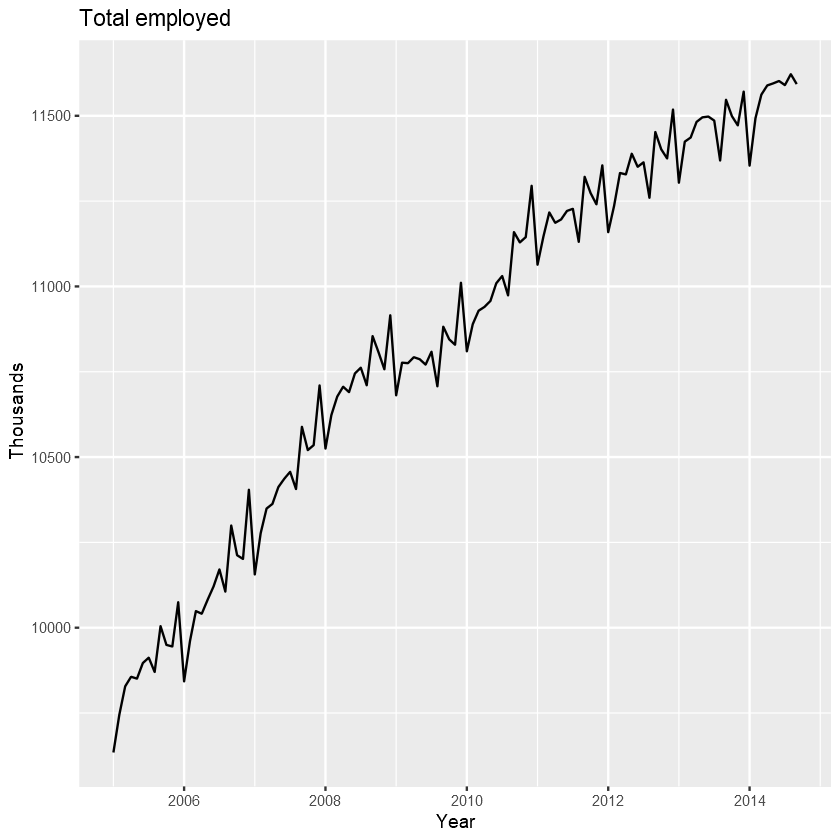

In [19]:
autoplot(window(x, start=c(2005,1))) +
  ggtitle("Total employed") +
  ylab("Thousands") + xlab("Year")

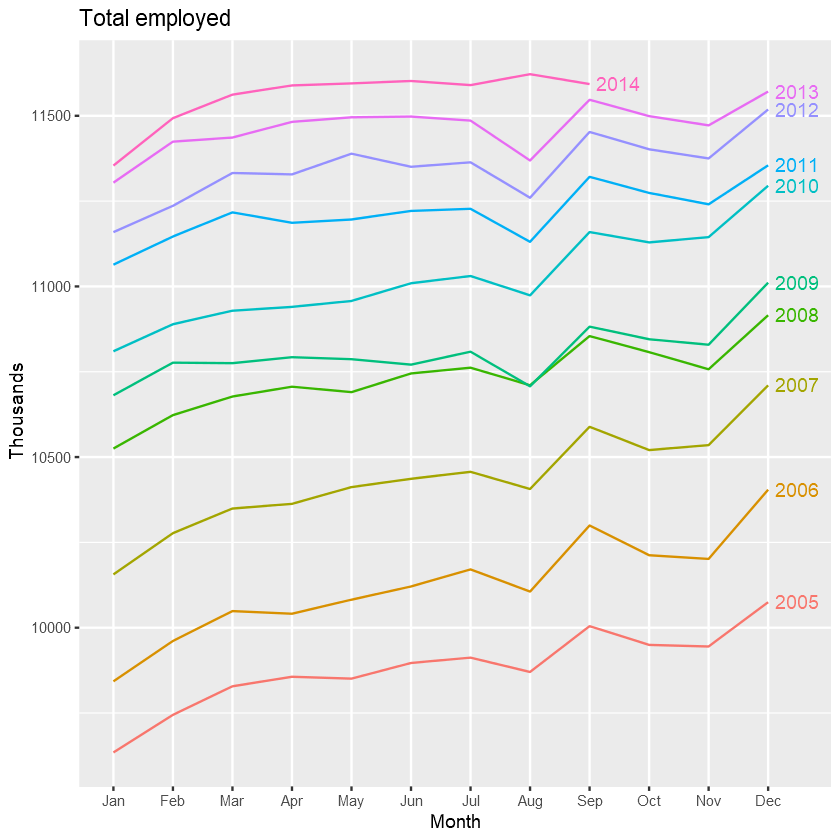

In [20]:
ggseasonplot(window(x,start=c(2005,1)), year.labels=TRUE) +
  ggtitle("Total employed") + ylab("Thousands")

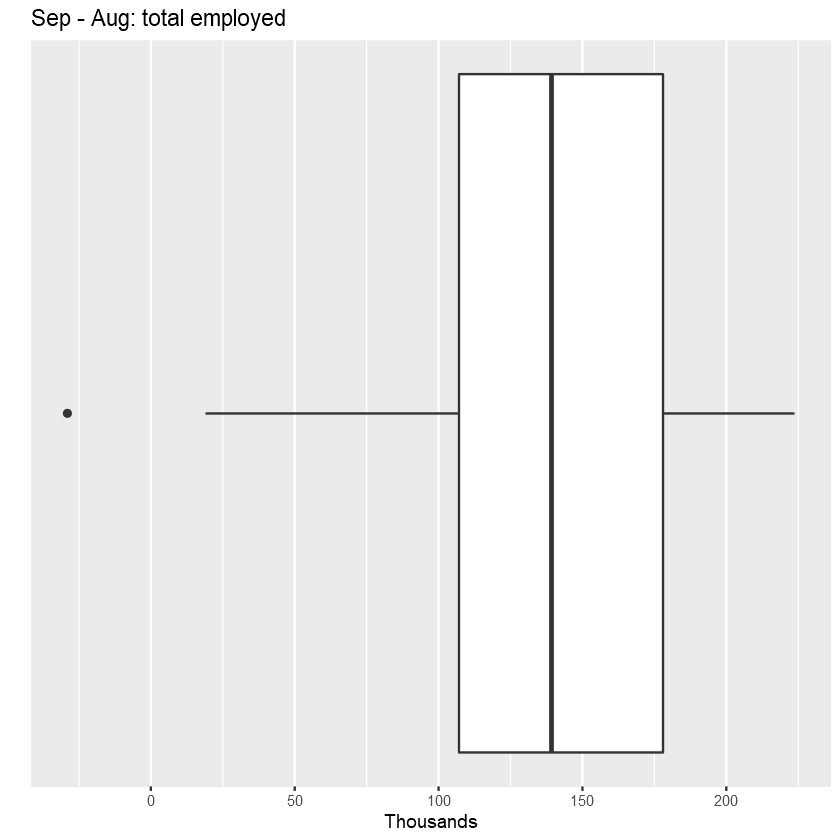

In [22]:
aug <- x[seq(7,440,by=12)]
sep <- x[seq(8,440,by=12)]
ggplot(data.frame(diff=sep-aug, x=rep(1,length(aug)))) +
  geom_boxplot(aes(y=diff,x=1)) + coord_flip() +
  ggtitle("Sep - Aug: total employed") + xlab("") + ylab("Thousands") +
  scale_x_continuous(breaks=NULL, labels=NULL)

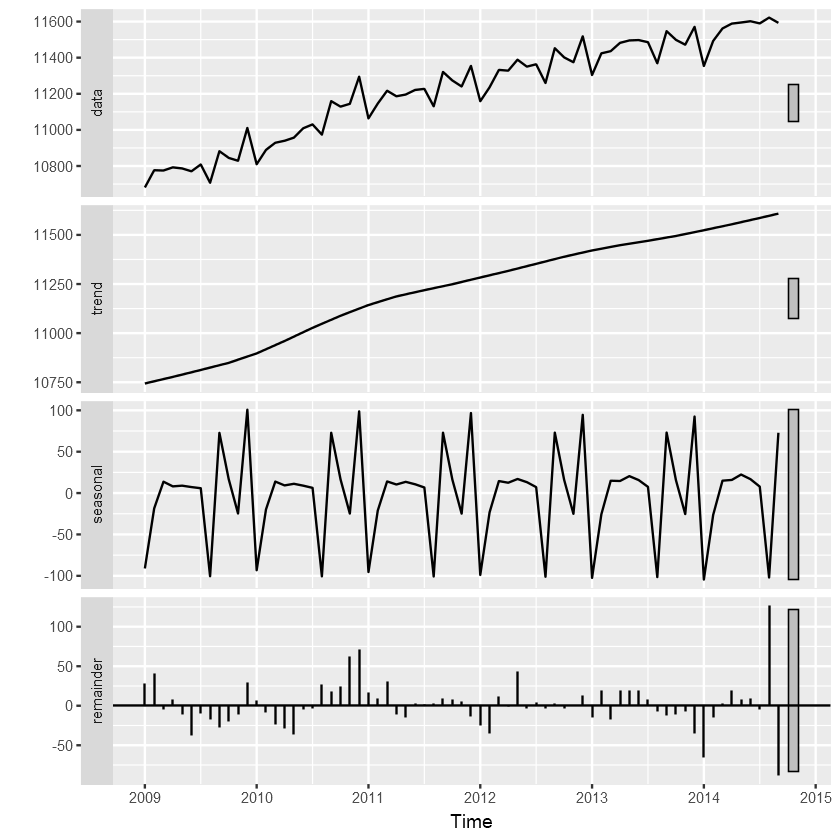

In [23]:
x %>% window(start=2009) %>%
 stl(s.window=11, robust=TRUE) -> fit
autoplot(fit)

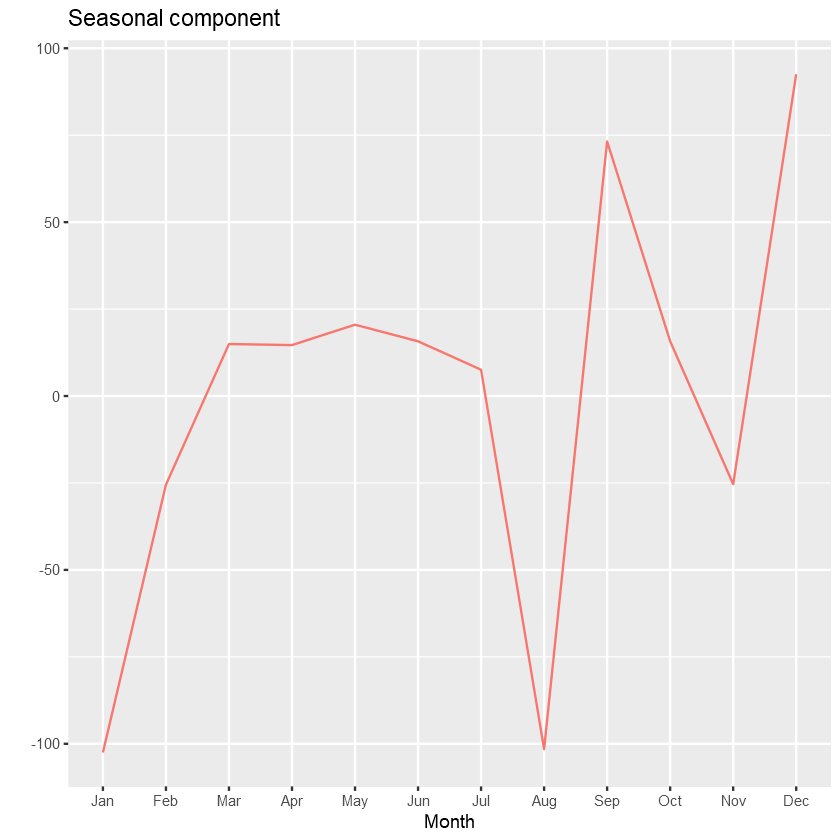

In [24]:
ggseasonplot(window(fit$time.series[,'seasonal'],start=2013,end=2013.999),
             year.labels=FALSE) +
  ggtitle("Seasonal component") +
  guides(colour="none")

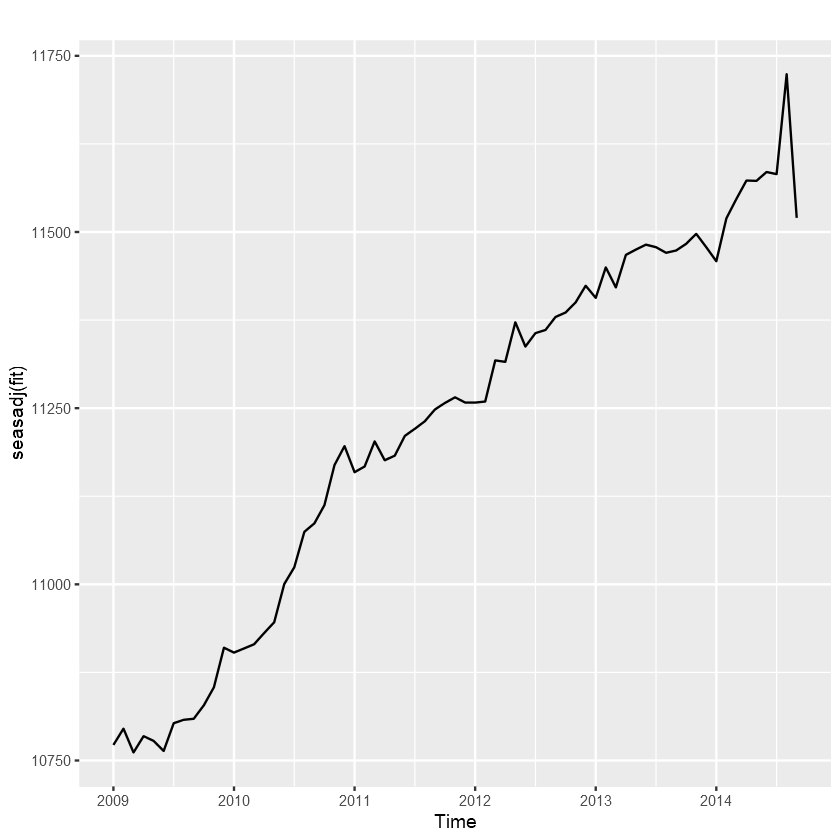

In [25]:
autoplot(seasadj(fit))

## X-11 decomposition

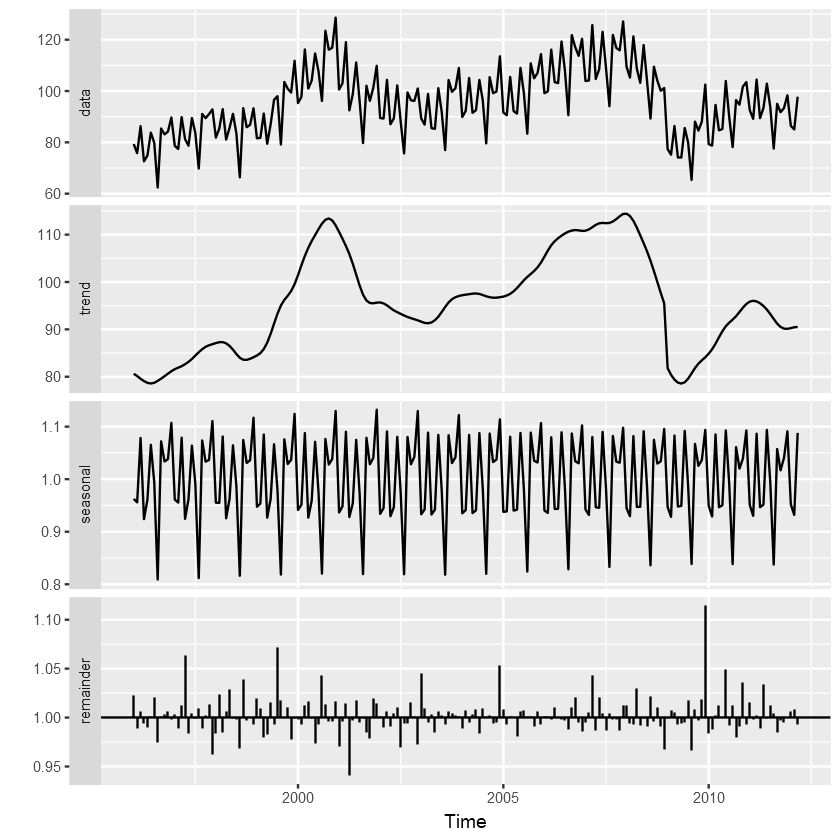

In [26]:
library(seasonal)
fit <- seas(elecequip, x11="")
autoplot(fit)

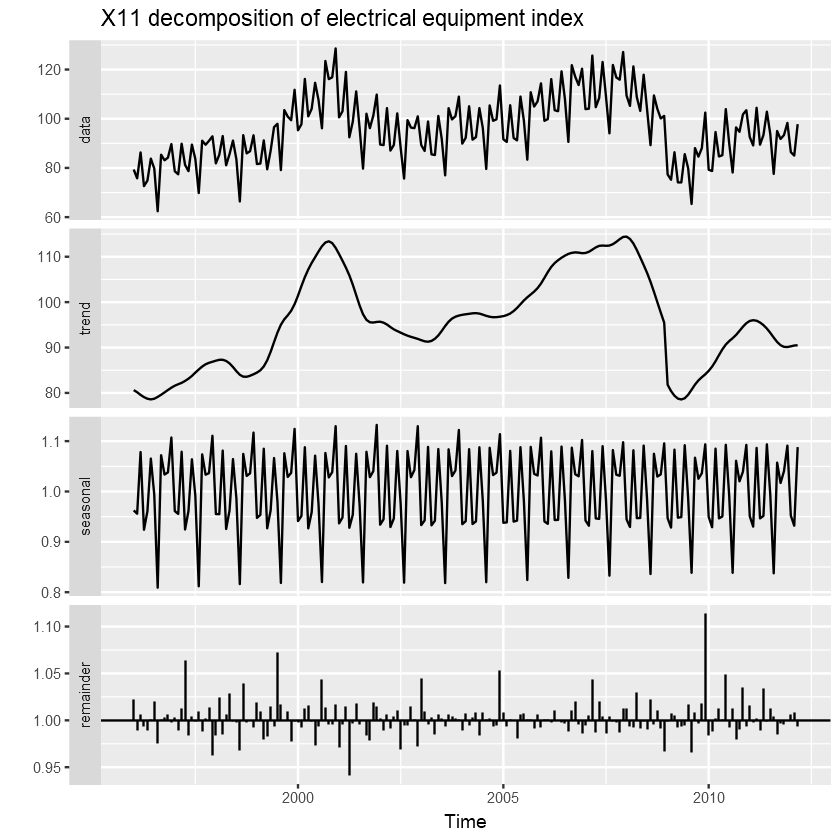

In [27]:
library(seasonal)
fit <- seas(elecequip, x11="")
autoplot(fit) +
  ggtitle("X11 decomposition of electrical equipment index")

## SEATS decomposition

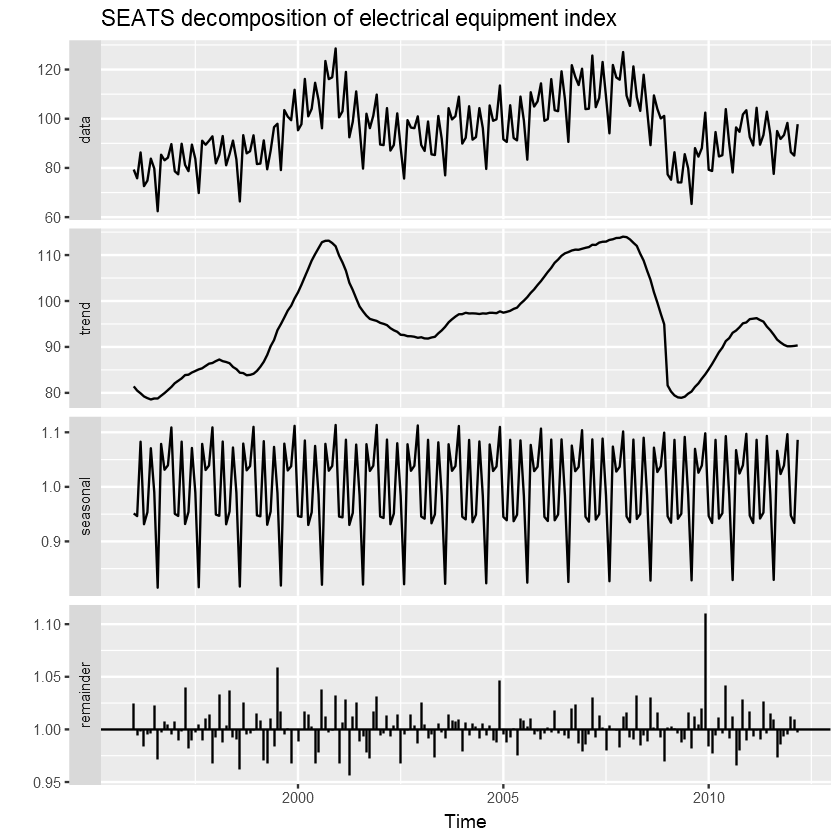

In [29]:
library(seasonal)
fit <- seas(elecequip)
autoplot(fit) +
  ggtitle("SEATS decomposition of electrical equipment index")

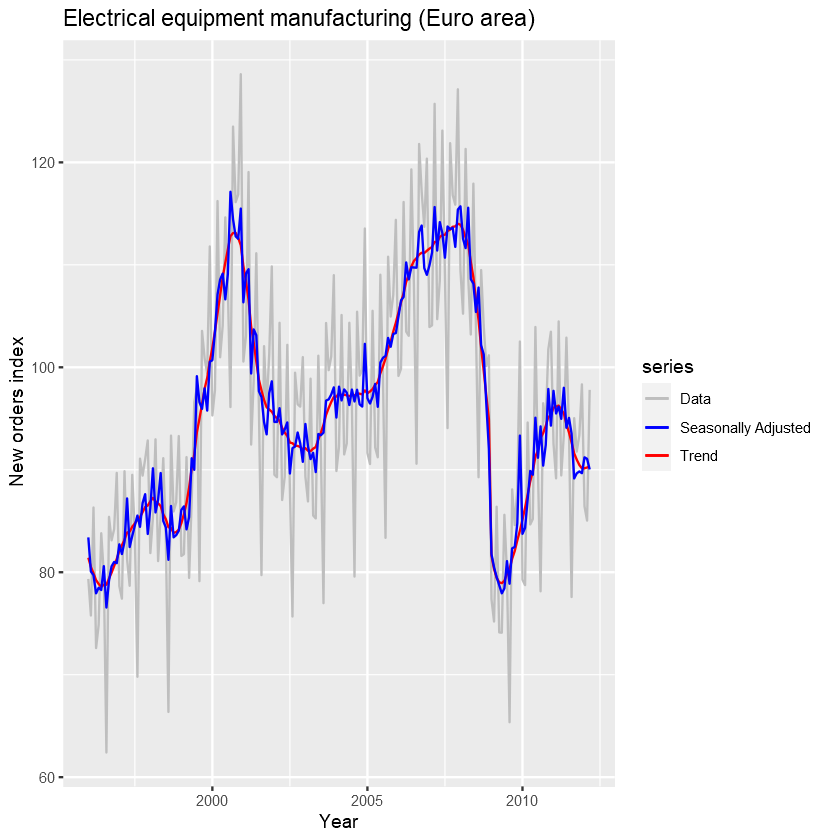

In [30]:
autoplot(elecequip, series="Data") +
  autolayer(trendcycle(fit), series="Trend") +
  autolayer(seasadj(fit), series="Seasonally Adjusted") +
  xlab("Year") + ylab("New orders index") +
  ggtitle("Electrical equipment manufacturing (Euro area)") +
  scale_colour_manual(values=c("gray","blue","red"),
                     breaks=c("Data","Seasonally Adjusted","Trend"))

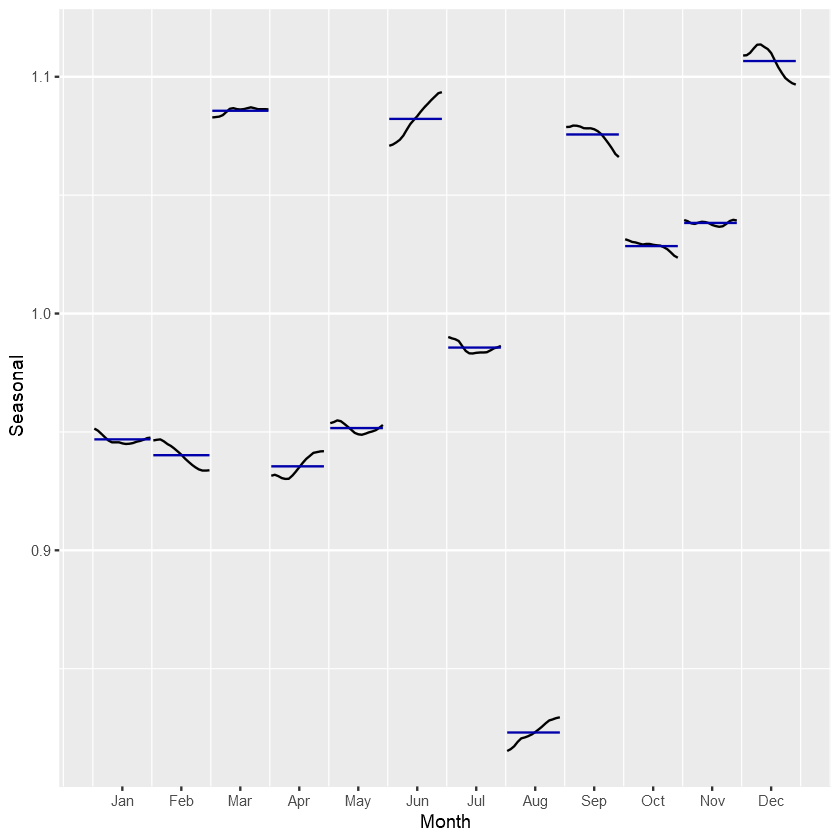

In [31]:
ggsubseriesplot(seasonal(fit)) + ylab("Seasonal")

## STL decomposition

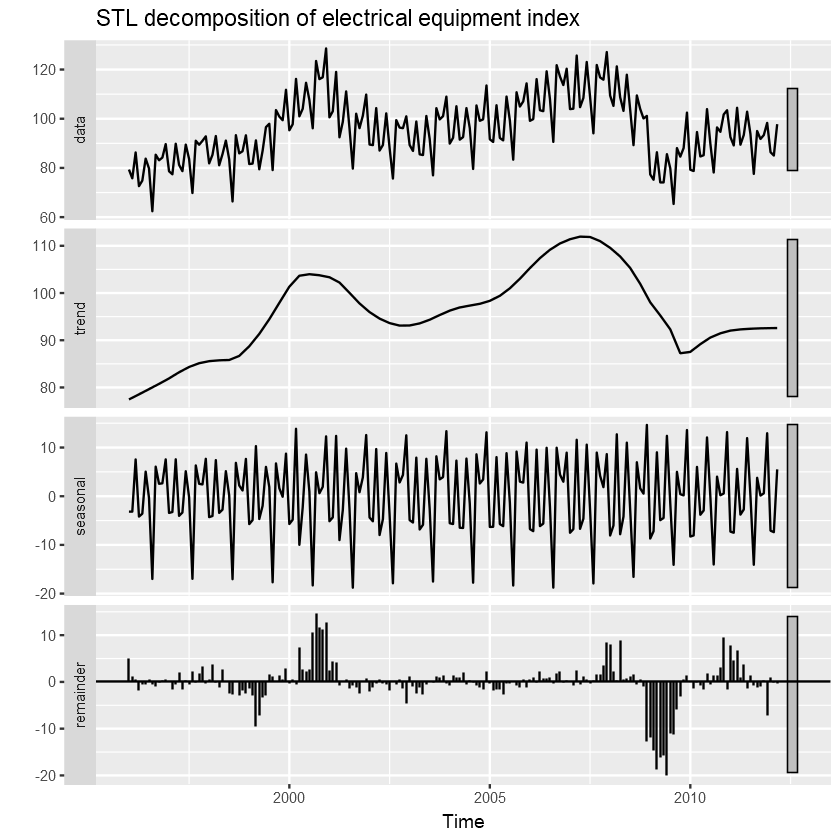

In [32]:
fit <- stl(elecequip, s.window=5, robust=TRUE)
autoplot(fit) +
  ggtitle("STL decomposition of electrical equipment index")

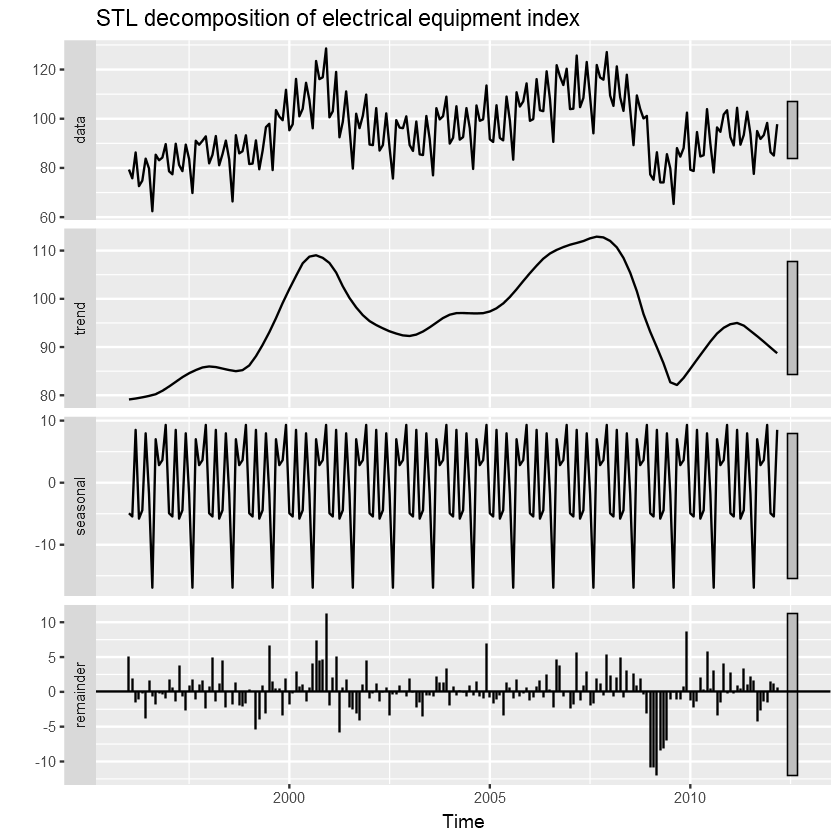

In [33]:
fit <- stl(elecequip, s.window="periodic", robust=TRUE)
autoplot(fit) +
  ggtitle("STL decomposition of electrical equipment index")

## Forecasting and decomposition

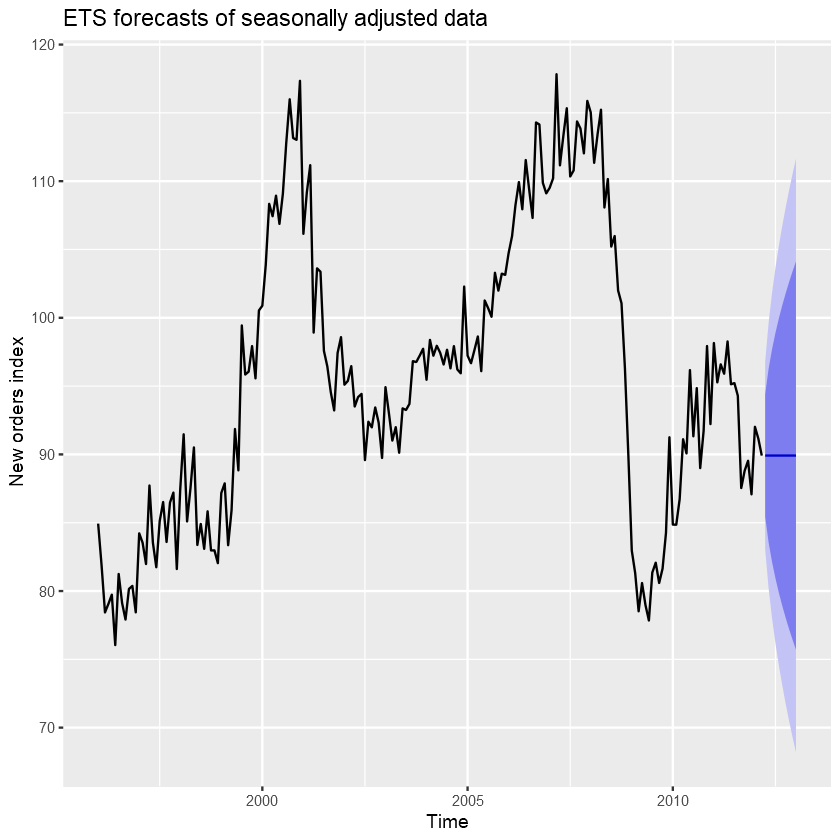

In [34]:
fit <- stl(elecequip, t.window=13, s.window="periodic")
fit %>% seasadj() %>% naive() %>%
  autoplot() + ylab("New orders index") +
  ggtitle("ETS forecasts of seasonally adjusted data")

### Electrical equipment

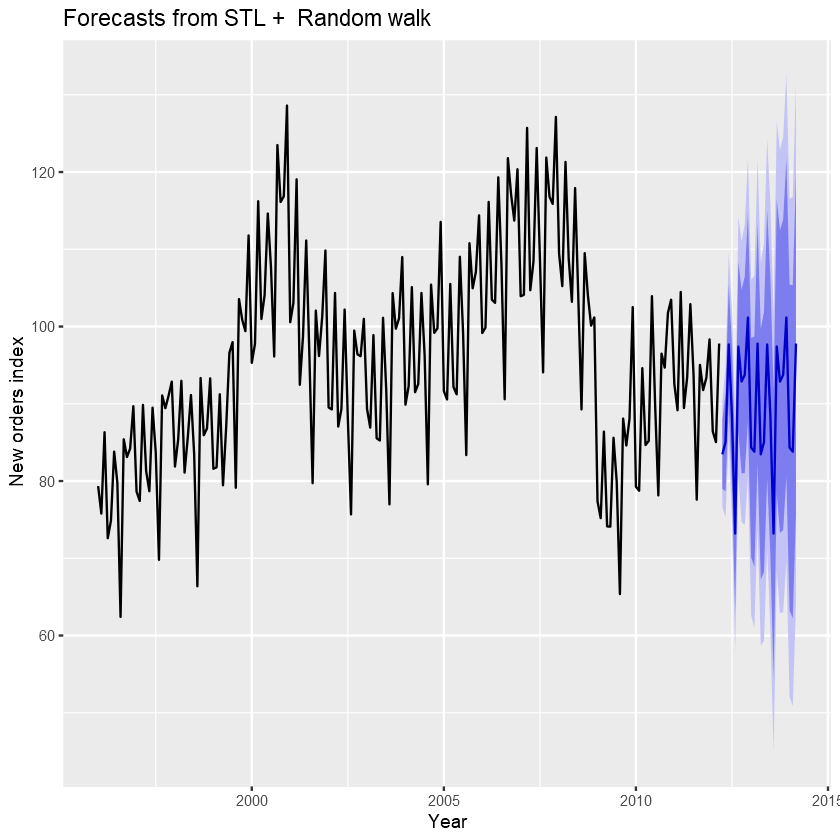

In [35]:
fit %>% forecast(method='naive') %>%
  autoplot() + ylab("New orders index") + xlab("Year")

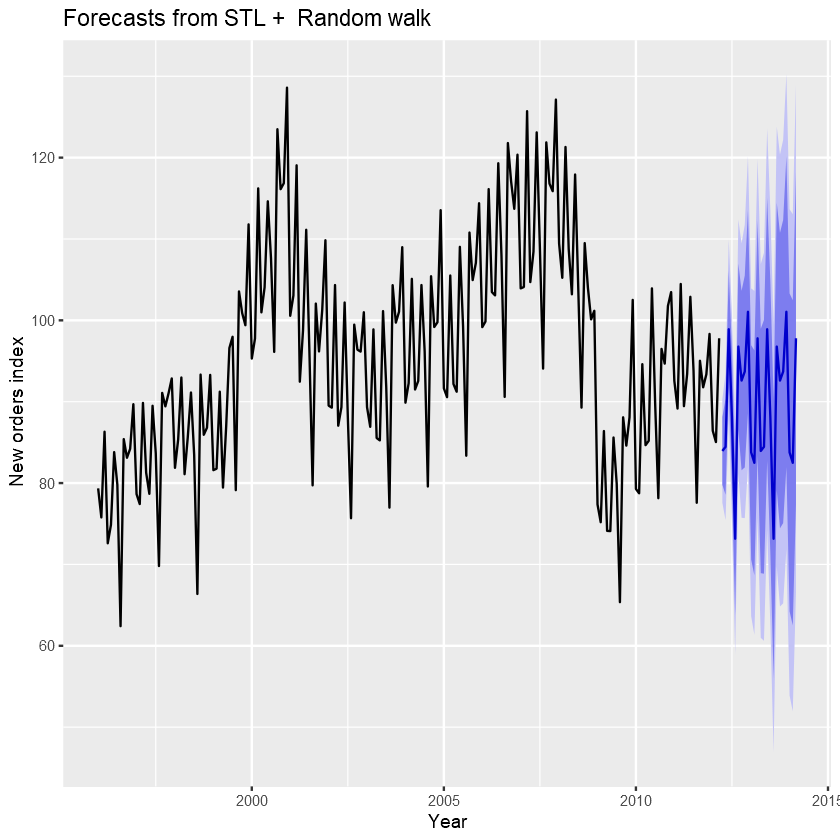

In [36]:
elecequip %>% stlf(method='naive') %>%
  autoplot() + ylab("New orders index") + xlab("Year")